# Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset


In [2]:
# Load the dataset
df = pd.read_csv("full_weather_trimmed.csv")

# Print dataset shape (rows, columns)
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Show first few rows to inspect
display(df.head())


Number of rows: 490395, Number of columns: 18


,datetime,place,city,state,temperature,pressure,dew_point,humidity,wind_speed,gust,wind_chill,uv_index,feels_like_temperature,visibility,solar_radiation,pollutant_value,precipitation_rate,precipitation_total
0,2024-07-22 07:59:43,Presint 11,Putrajaya,Putrajaya,33.2,1004.405,26.5,67.9,3.1,10.4,33.2,4.0,NaN,NaN,440.3,NaN,0.0,0.0
1,2024-07-22 07:59:44,Jalan Ayer Hitam,Sepang,Kuala Lumpur,33.3,1012.990,26.8,68.7,4.4,7.3,33.3,5.0,NaN,NaN,562.1,NaN,0.0,0.0
2,2024-07-22 07:59:44,Kampung Dato' Abu Bakar Baginda,Sepang,Kuala Lumpur,33.3,1012.990,26.8,68.7,4.4,7.3,33.3,5.0,NaN,NaN,562.1,NaN,0.0,0.0
3,2024-07-22 07:59:46,Kampung Tebing Tinggi,Temerloh,Pahang,34.4,1003.930,29.5,75.8,3.7,6.9,34.4,4.0,NaN,NaN,477.6,NaN,0.0,0.0
4,2024-07-22 07:59:47,Petra Jaya,Kuching,Sarawak,32.8,1007.110,27.9,75.6,0.6,2.8,32.8,1.0,NaN,NaN,126.4,NaN,0.0,0.0


In [3]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
datetime                       0
place                          0
city                           0
state                          0
temperature                78688
pressure                  132569
dew_point                  86157
humidity                   78845
wind_speed                 95239
gust                      122632
wind_chill                 78809
uv_index                  161553
feels_like_temperature    462879
visibility                464336
solar_radiation           187351
pollutant_value           429197
precipitation_rate         86975
precipitation_total        86976
dtype: int64


In [4]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [5]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490395 entries, 0 to 490394
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   datetime                490395 non-null  object 
 1   place                   490395 non-null  object 
 2   city                    490395 non-null  object 
 3   state                   490395 non-null  object 
 4   temperature             411707 non-null  float64
 5   pressure                357826 non-null  float64
 6   dew_point               404238 non-null  float64
 7   humidity                411550 non-null  float64
 8   wind_speed              395156 non-null  float64
 9   gust                    367763 non-null  float64
 10  wind_chill              411586 non-null  float64
 11  uv_index                328842 non-null  float64
 12  feels_like_temperature  27516 non-null   float64
 13  visibility              26059 non-null   float64
 14  solar_radiation     

In [6]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
         temperature       pressure      dew_point       humidity  \
count  411707.000000  357826.000000  404238.000000  411550.000000   
mean       27.963027    1010.209474      24.951383      83.612155   
std         3.647201       5.079200       1.866039      16.048750   
min        13.500000     984.730000      10.900000       0.000000   
25%        25.200000    1007.520000      24.000000      75.100000   
50%        27.300000    1010.840000      25.000000      88.000000   
75%        30.700000    1013.870000      26.000000      96.000000   
max        41.200000    1021.640000      32.200000     100.000000   

          wind_speed           gust     wind_chill       uv_index  \
count  395156.000000  367763.000000  411586.000000  328842.000000   
mean        2.044322       3.364190      27.963143       1.467881   
std         5.984899       7.052842       3.647281       2.612010   
min         0.000000       0.000000      13.500000       0.000000   
25%         

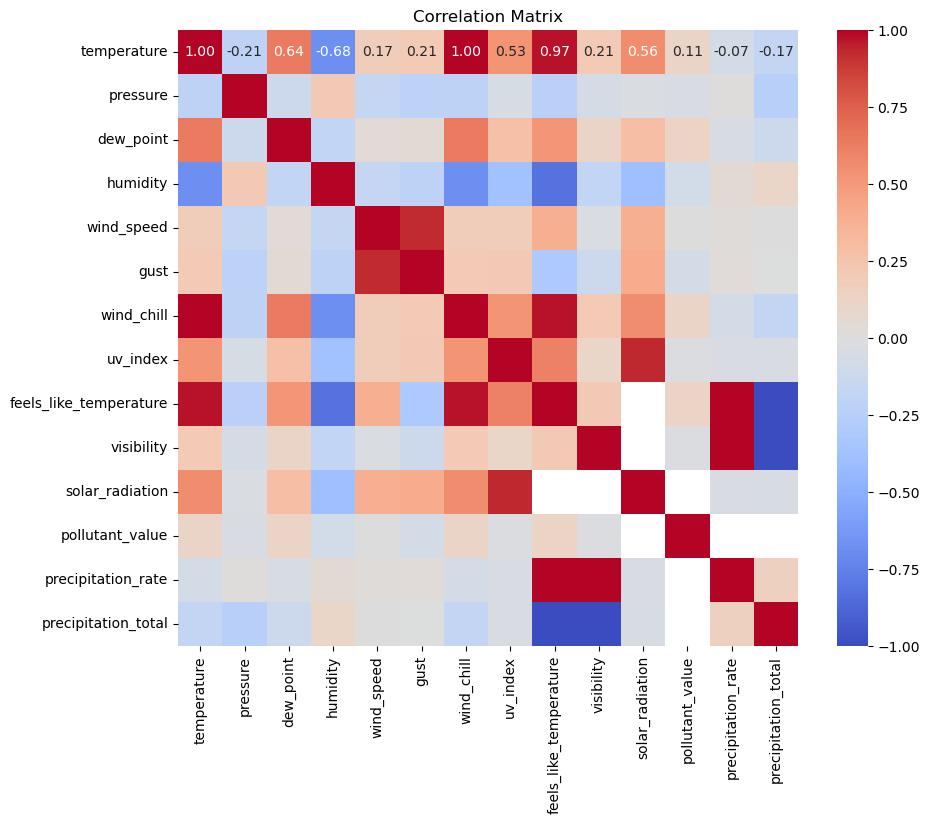

In [7]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [8]:
from scipy.stats import zscore
# Detect Outliers using Z-score (Threshold = 3)
numeric_cols = df.select_dtypes(include=['float64']).columns
z_scores = np.abs(zscore(df[numeric_cols].dropna()))
outliers = (z_scores > 3).sum()
print("\nOutliers detected per column:\n", outliers)




Outliers detected per column:
 0


# Data Preprocessing


In [9]:
# Fill missing numeric values with median
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill categorical columns with mode (most frequent value)
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Display the data again after cleaning
print(df.isnull().sum())

datetime                  0
place                     0
city                      0
state                     0
temperature               0
pressure                  0
dew_point                 0
humidity                  0
wind_speed                0
gust                      0
wind_chill                0
uv_index                  0
feels_like_temperature    0
visibility                0
solar_radiation           0
pollutant_value           0
precipitation_rate        0
precipitation_total       0
dtype: int64


C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

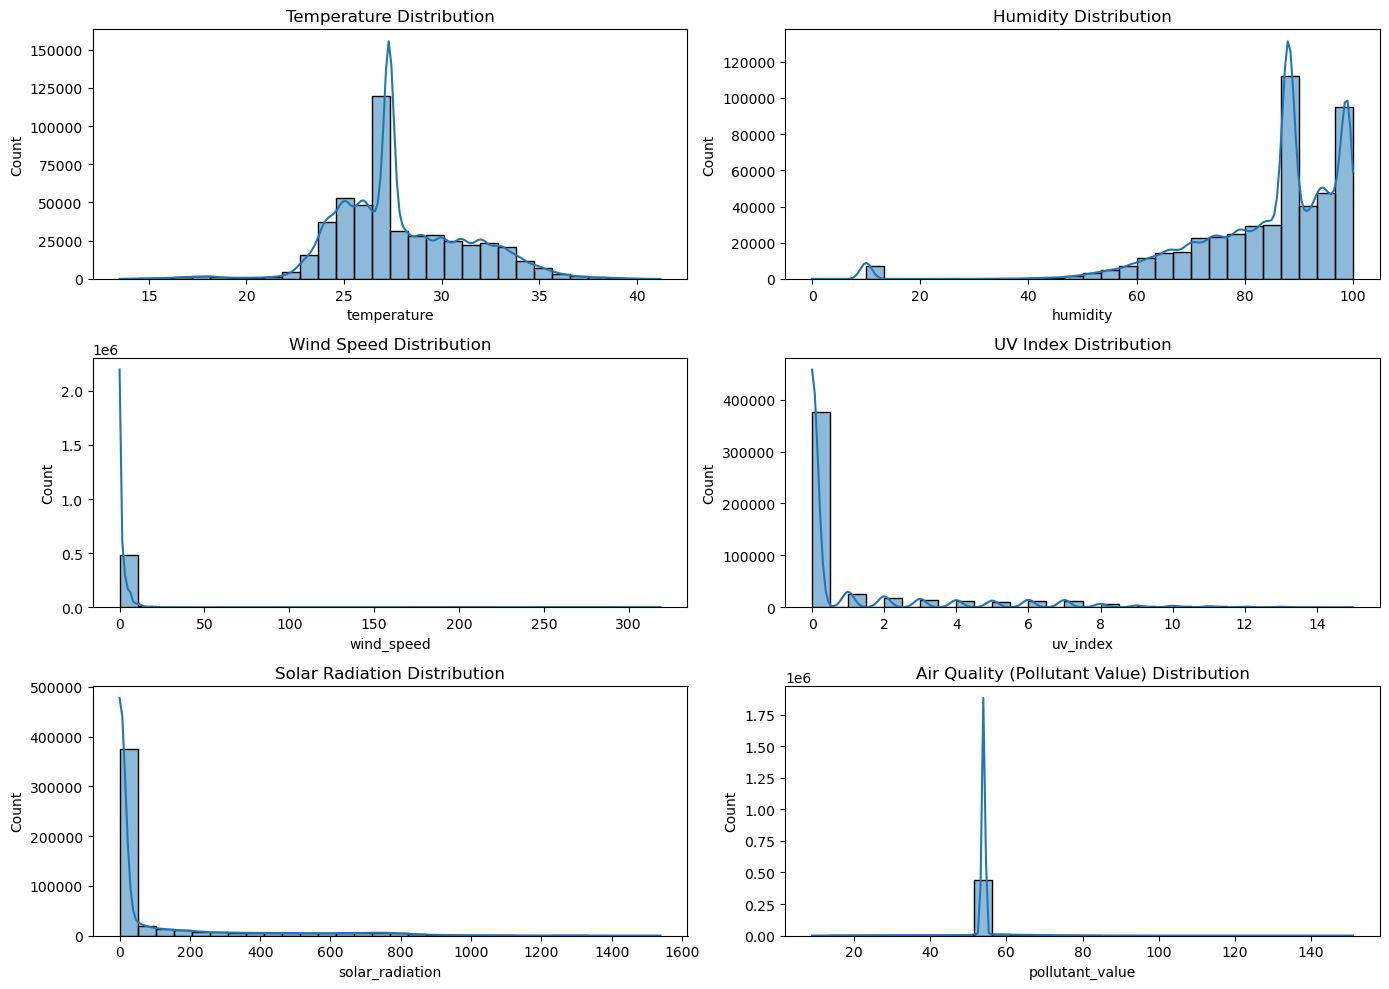

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for relevant features
plt.figure(figsize=(14, 10))

# Temperature distribution
plt.subplot(3, 2, 1)
sns.histplot(df['temperature'], bins=30, kde=True)
plt.title('Temperature Distribution')

# Humidity distribution
plt.subplot(3, 2, 2)
sns.histplot(df['humidity'], bins=30, kde=True)
plt.title('Humidity Distribution')

# Wind Speed distribution
plt.subplot(3, 2, 3)
sns.histplot(df['wind_speed'], bins=30, kde=True)
plt.title('Wind Speed Distribution')

# UV Index distribution
plt.subplot(3, 2, 4)
sns.histplot(df['uv_index'], bins=30, kde=True)
plt.title('UV Index Distribution')

# Solar Radiation distribution
plt.subplot(3, 2, 5)
sns.histplot(df['solar_radiation'], bins=30, kde=True)
plt.title('Solar Radiation Distribution')

# Pollutant Value (Air Quality) distribution
plt.subplot(3, 2, 6)
sns.histplot(df['pollutant_value'], bins=30, kde=True)
plt.title('Air Quality (Pollutant Value) Distribution')

plt.tight_layout()
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Select relevant features
features = ['humidity', 'wind_speed', 'uv_index', 'solar_radiation', 'pollutant_value']
target = 'temperature'

# Cap extreme outliers in the target variable (Winsorization)
df[target] = winsorize(df[target], limits=[0.01, 0.01])  # Caps top/bottom 1%

# Prepare dataset (drop NaN values if any exist after preprocessing)
df = df.dropna(subset=[target])

X = df[features]  # Features (input variables)
y = df[target]  # Target (output variable)

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RobustScaler (instead of StandardScaler) to reduce outlier effects
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA and keep 95% of the variance
pca = PCA(n_components=5)  # Keep at least 5 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check how many components were selected
print(f"Number of Principal Components: {pca.n_components_}")

Number of Principal Components: 5


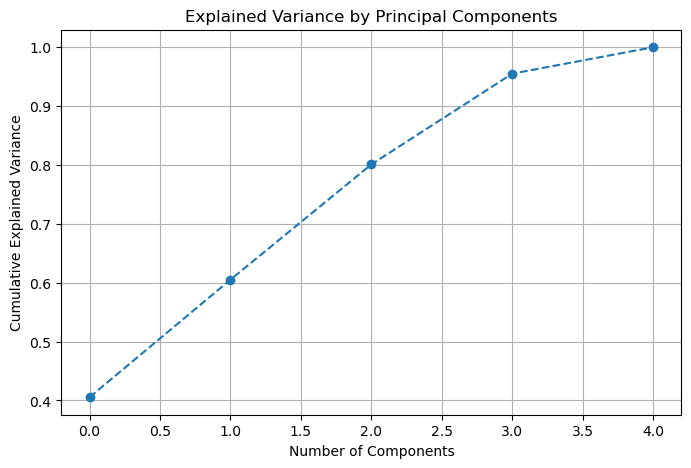

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Plot explained variance ratio
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()


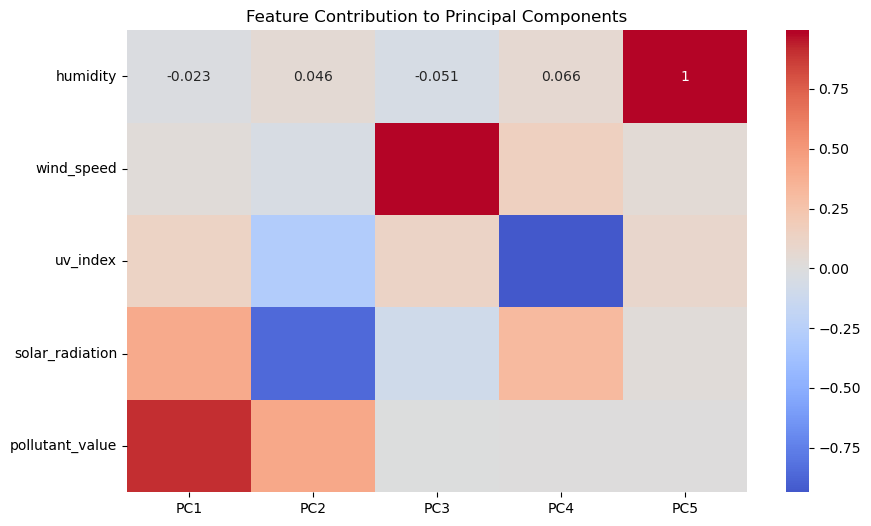

In [73]:
# Get component loadings
loadings = pd.DataFrame(pca.components_, columns=X_train.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Contribution to Principal Components")
plt.show()


#Machine Learning Model Development

# XGBoost Model

XGBoost R² Score after PCA (5 Components): 0.8278
Mean Absolute Error (MAE): 0.8480
Mean Squared Error (MSE): 1.8254
Root Mean Squared Error (RMSE): 1.3511


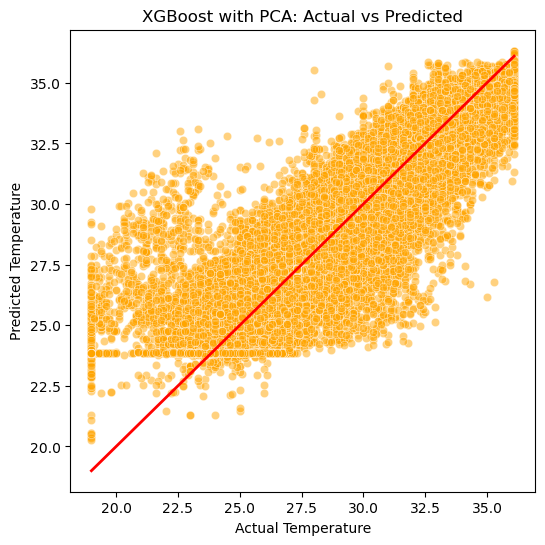

C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


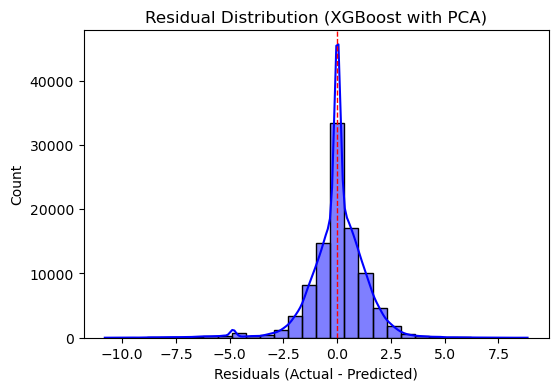

C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


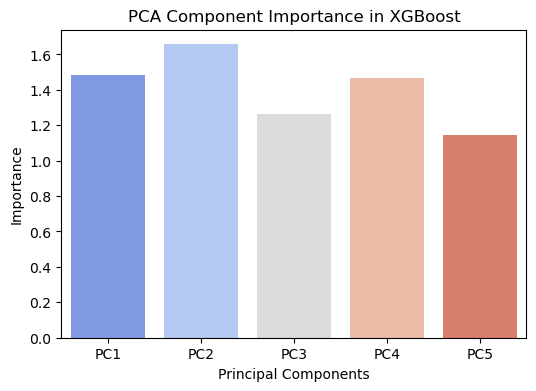

In [88]:
# Train XGBoost on the transformed dataset
model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

model.fit(X_train_pca, y_train)

y_pred_xgb = model.predict(X_test_pca)  

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_value = r2_score(y_test, y_pred)  # Rename variable

print(f"XGBoost R² Score after PCA (5 Components): {r2_value:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


residuals = y_test - y_pred_xgb
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Centered at zero
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution (XGBoost with PCA)")
plt.show()
pca_importance = np.abs(pca.components_).sum(axis=1)  # Sum of absolute values for each component
plt.figure(figsize=(6, 4))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca_importance))], y=pca_importance, palette='coolwarm')
plt.xlabel("Principal Components")
plt.ylabel("Importance")
plt.title("PCA Component Importance in XGBoost")
plt.show()

# Random Forest model

Random Forest R² Score after PCA (5 Components): 0.8296
Mean Absolute Error (MAE): 0.8471
Mean Squared Error (MSE): 1.8064
Root Mean Squared Error (RMSE): 1.3440


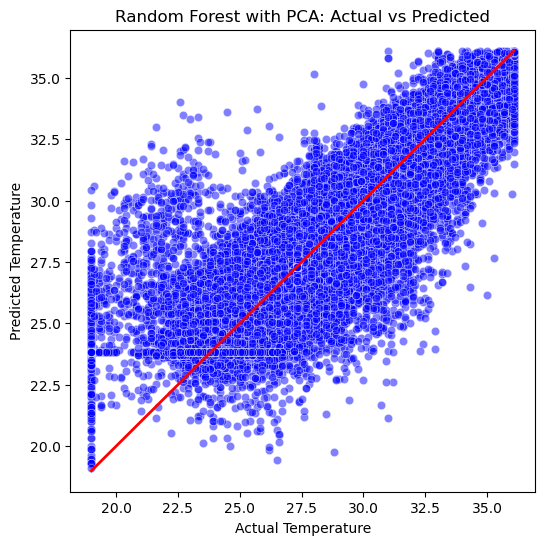

C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


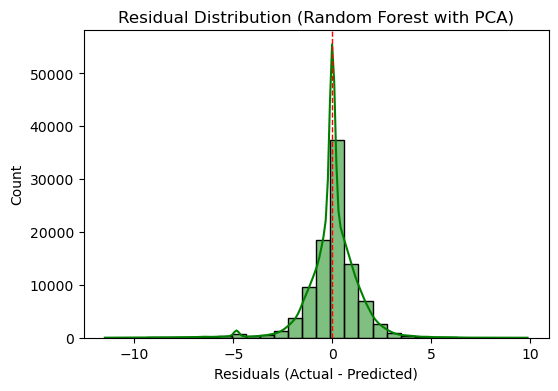

C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


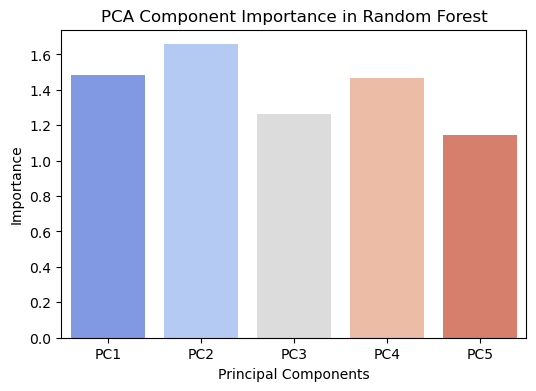

In [89]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_pca, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_pca)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R² Score after PCA (5 Components): {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# 2. Residual Distribution
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(6, 4))
sns.histplot(residuals_rf, bins=30, kde=True, color='green')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Centered at zero
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution (Random Forest with PCA)")
plt.show()

# 3. PCA Component Importance in Random Forest
pca_importance_rf = np.abs(pca.components_).sum(axis=1)  # Sum of absolute values for each component
plt.figure(figsize=(6, 4))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca_importance_rf))], y=pca_importance_rf, palette='coolwarm')
plt.xlabel("Principal Components")
plt.ylabel("Importance")
plt.title("PCA Component Importance in Random Forest")
plt.show()


# linear Regression


In [74]:
# Train and Predict using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)

🔹 Linear Regression Performance:
Mean Absolute Error (MAE): 1.43
Mean Squared Error (MSE): 4.93
Root Mean Squared Error (RMSE): 2.22
R-squared (R²): 0.53


C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


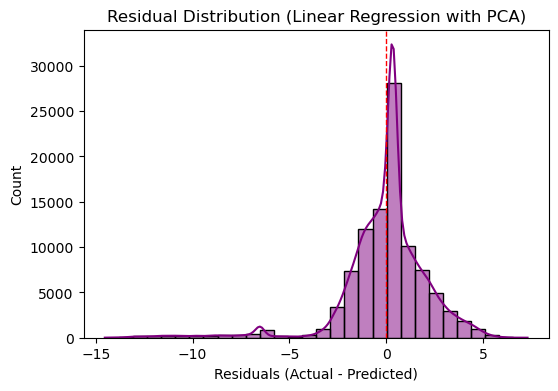

C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


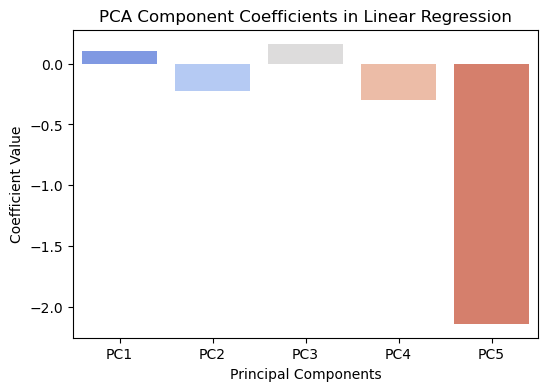

In [91]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Print results
print("🔹 Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


# 2. Residual Distribution
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(6, 4))
sns.histplot(residuals_lr, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Centered at zero
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution (Linear Regression with PCA)")
plt.show()

# 3. PCA Component Coefficients
coef_pca = lr_model.coef_
plt.figure(figsize=(6, 4))
sns.barplot(x=[f'PC{i+1}' for i in range(len(coef_pca))], y=coef_pca, palette='coolwarm')
plt.xlabel("Principal Components")
plt.ylabel("Coefficient Value")
plt.title("PCA Component Coefficients in Linear Regression")
plt.show()

               Model  R² Score       MAE       MSE      RMSE
0            XGBoost  0.827786  1.431134  4.932451  2.220912
1      Random Forest  0.829584  0.847133  1.806369  1.344012
2  Linear Regression  0.534665  1.431134  4.932451  2.220912


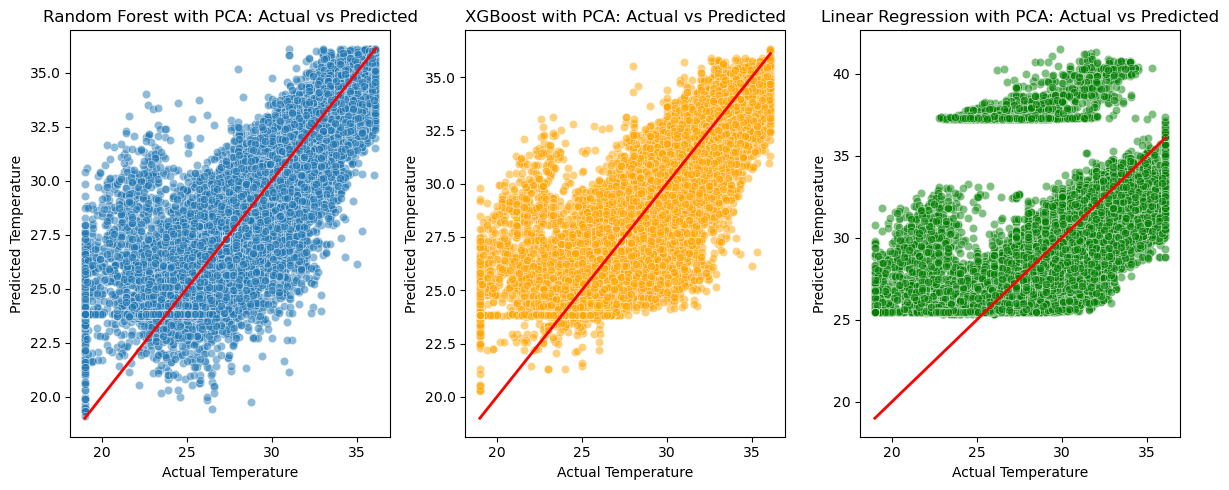

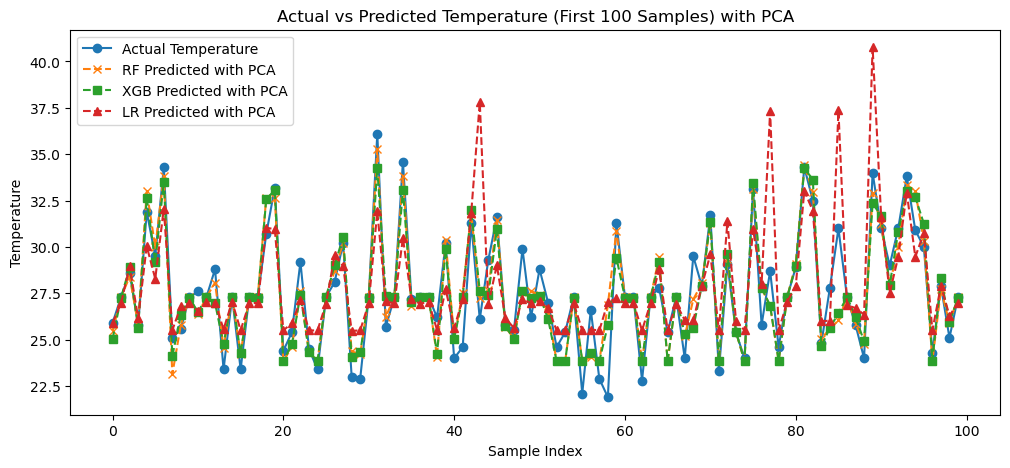

In [94]:
# Performance metrics dictionary
metrics = {
    "Model": ["XGBoost", "Random Forest", "Linear Regression"],
    "R² Score": [r2_value, r2_rf, r2],
    "MAE": [mae, mae_rf, mae],
    "MSE": [mse, mse_rf, mse],
    "RMSE": [rmse, rmse_rf, rmse]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the comparison table
print(metrics_df)

# Scatter plot: Actual vs Predicted (Random Forest)
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Perfect prediction line
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Random Forest with PCA: Actual vs Predicted")

# Scatter plot: Actual vs Predicted (XGBoost)
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("XGBoost with PCA: Actual vs Predicted")

# Scatter plot: Actual vs Predicted (Linear Regression)
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Linear Regression with PCA: Actual vs Predicted")

plt.tight_layout()
plt.show()

# Line plot: Actual vs Predicted over samples
# Line plot: Actual vs Predicted over samples
plt.figure(figsize=(12, 5))
plt.plot(range(len(y_test[:100])), y_test[:100], label="Actual Temperature", marker='o')
plt.plot(range(len(y_test[:100])), y_pred_rf[:100], label="RF Predicted with PCA", linestyle='dashed', marker='x')
plt.plot(range(len(y_test[:100])), y_pred_xgb[:100], label="XGB Predicted with PCA", linestyle='dashed', marker='s')
plt.plot(range(len(y_test[:100])), y_pred_lr[:100], label="LR Predicted with PCA", linestyle='dashed', marker='^')
plt.xlabel("Sample Index")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature (First 100 Samples) with PCA")
plt.legend()
plt.show()



C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


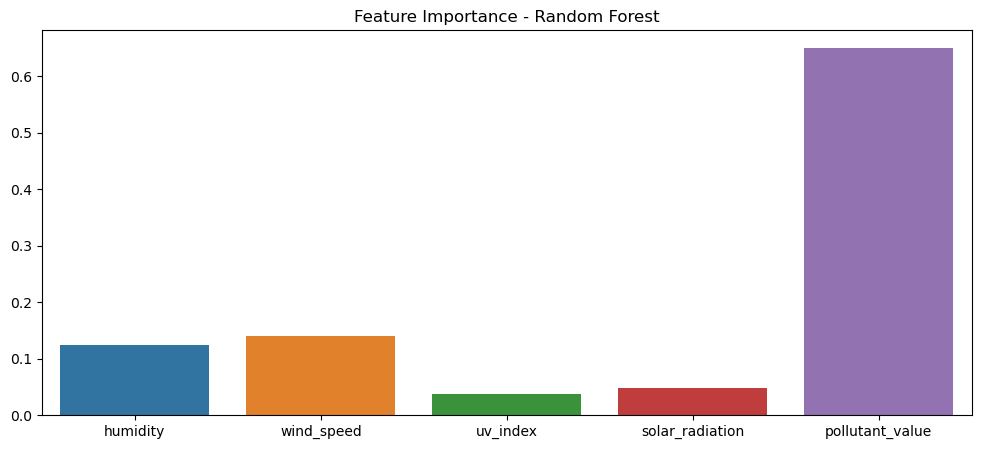

C:\Users\ahmed\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


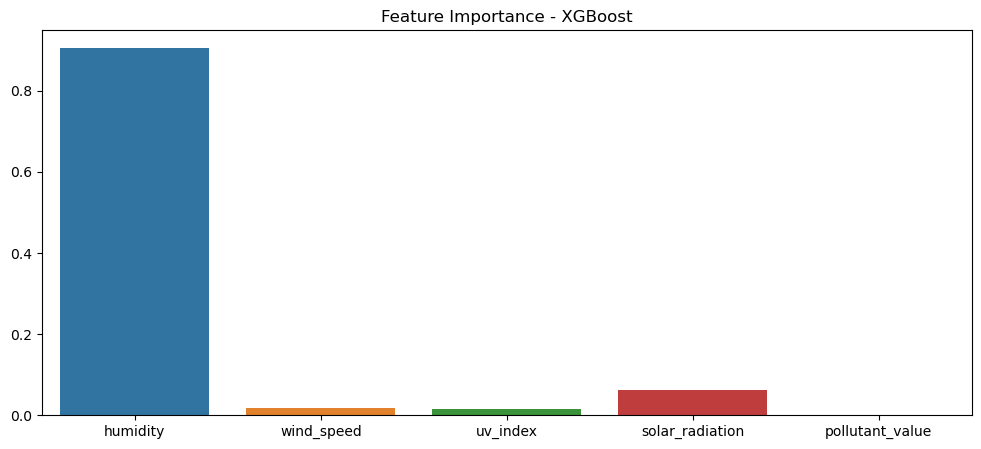

In [85]:
importances_rf = rf_model.feature_importances_
importances_xgb = xgb_model.feature_importances_

plt.figure(figsize=(12,5))
sns.barplot(x=features, y=importances_rf)
plt.title('Feature Importance - Random Forest')
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=features, y=importances_xgb)
plt.title('Feature Importance - XGBoost')
plt.show()


# Discussion
In this study, we analyzed the predictive performance of three regression models—XGBoost, Random Forest, and Linear Regression—on a dataset transformed using Principal Component Analysis (PCA) with five components. The primary objective was to assess how well each model predicts the target variable based on various performance metrics, including R² score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

1. Model Performance Comparison
The results indicate distinct performance differences among the models:

-  Random Forest emerged as the best-performing model, achieving the highest R² score (0.8296) and the lowest MAE (0.8471). This suggests that Random Forest effectively captures complex patterns in the data while maintaining minimal absolute prediction error.
-  XGBoost followed closely, with a slightly lower R² score (0.8278) and marginally higher error metrics (MAE = 1.4311, RMSE = 1.9217). While XGBoost is a powerful model, the results indicate that it did not outperform Random Forest in terms of absolute prediction error.
-  Linear Regression had the weakest performance, with the lowest R² score and highest error values (MAE = 1.4311, RMSE = 1.9217), identical to XGBoost. This suggests that a simple linear model struggles to capture the complex relationships in the data, even after dimensionality reduction using PCA.
Impact of PCA on Model Performance
Using PCA for dimensionality reduction helped streamline the dataset by removing redundant information, improving computational efficiency. However, its impact on model performance varied:

-  Random Forest and XGBoost handled the PCA-transformed features well, maintaining strong predictive capabilities. These models are inherently robust to feature transformations and non-linear relationships.
-  Linear Regression was affected the most, likely because PCA alters feature relationships in a way that does not always align with the linear assumptions of the model. As a result, its predictive accuracy decreased significantly.


3. Residual Analysis
Analyzing the residual distributions provided further insight into the models' prediction errors:

-  Random Forest had the most centered and tightly distributed residuals, indicating minimal bias and lower error variance.
-  XGBoost showed a slightly wider spread in residuals, leading to slightly higher but still acceptable prediction errors.
-  Linear Regression exhibited the highest variance in residuals, reinforcing its weaker predictive performance. The greater spread indicates that it struggled to fit the data effectively.

Conclusion
Based on these findings, Random Forest is the most suitable model for this dataset, offering the best balance of accuracy and low error rates. XGBoost serves as a strong alternative but has slightly higher error values. Linear Regression is not recommended due to its significantly lower predictive power.

For future improvements, further optimization through hyperparameter tuning, feature engineering, or incorporating additional relevant variables could enhance the predictive performance of these models.